In [1]:
from datetime import datetime, timedelta

from subutil.schema_utils import *
from queryportal.subgraphinterface import SubgraphInterface

# plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import polars as pl
pl.Config.set_fmt_str_lengths(200)

polars.config.Config

In [2]:
# HOSTED Endpoints
sgi = SubgraphInterface(endpoints=[
    'https://api.thegraph.com/subgraphs/name/ryabina-io/graphscan', 
    ]   
)

In [3]:
sg_schema = getSubgraphSchema(sgi.subject.subgraphs['graphscan'])

In [4]:
queryable_entities = getQueryFields(sgi.subject.subgraphs['graphscan'], sg_schema[sg_schema.index('Query')])

In [5]:
queryable_entities.keys()

dict_keys(['graphNetworks', 'graphAccounts', 'graphAccountNames', 'subgraphs', 'currentSubgraphDeploymentRelations', 'networks', 'subgraphVersions', 'subgraphDeployments', 'indexers', 'indexerDelegatortRelations', 'allocations', 'pools', 'delegators', 'delegatedStakes', 'curators', 'signals', 'nameSignals', 'nameSignalSubgraphRelations', 'signalSubgraphDeploymentRelations', 'disputes', 'attestations', 'epoches', 'nameSignalTransactions', 'signalTransactions', 'bridgeWithdrawalTransactions', 'bridgeDepositTransactions', 'retryableTickets', 'retryableTicketRedeemAttempts', 'tokenManagers', 'authorizedFunctions', 'tokenLockWallets', 'indexerDeployments', 'rewardCutHistoryEntities', 'delegationPoolHistoryEntities', 'delegatorRewardHistoryEntities', 'transactions'])

### Subgraphs

In [10]:
subgraphs = sgi.query_entity(
    query_size=50,
    entity='subgraphs',
    name='graphscan'
)

Querying endpoint: graphscan
Return empty dict because filter_dict param is empty
Shape: (50, 28)
Schema: {'versionCount': Int64, 'createdAt': Int64, 'updatedAt': Int64, 'active': Boolean, 'migrated': Boolean, 'nftID': Utf8, 'oldID': Utf8, 'creatorAddress': Utf8, 'subgraphNumber': Int64, 'initializing': Boolean, 'entityVersion': Int64, 'signalledTokens': Float64, 'unsignalledTokens': Float64, 'currentSignalledTokens': Float64, 'nameSignalAmount': Float64, 'signalAmount': Float64, 'reserveRatio': Int64, 'withdrawableTokens': Int64, 'withdrawnTokens': Float64, 'nameSignalCount': Int64, 'currentNameSignalCount': Int64, 'metadataHash': Utf8, 'ipfsMetadataHash': Utf8, 'metadata': Boolean, 'owner_id': Utf8, 'currentVersion_id': Utf8, 'linkedEntity_id': Utf8, 'currentVersionRelationEntity_id': Utf8}
Function 'query_entity' executed in 1.1084s


In [11]:
subgraphs

versionCount,createdAt,updatedAt,active,migrated,nftID,oldID,creatorAddress,subgraphNumber,initializing,entityVersion,signalledTokens,unsignalledTokens,currentSignalledTokens,nameSignalAmount,signalAmount,reserveRatio,withdrawableTokens,withdrawnTokens,nameSignalCount,currentNameSignalCount,metadataHash,ipfsMetadataHash,metadata,owner_id,currentVersion_id,linkedEntity_id,currentVersionRelationEntity_id
i64,i64,i64,bool,bool,str,str,str,i64,bool,i64,f64,f64,f64,f64,f64,i64,i64,f64,i64,i64,str,str,bool,str,str,str,str
3,1626952878,1666288343,true,true,"""68799548758199140224151701590582019137924969401915573086349306511960790045480""","""0x00000444e5a1a667663b0adfd853e8efa0470698-0""","""0x00000444e5a1a667663b0adfd853e8efa0470698""",0,false,1,3.3049e22,3.0205e22,2.6292e21,4.9268e19,5.0577e19,1000000,0,0.0,15,6,"""0x29fe8c93cf33e180b79ac3323dc000d56fd2367f9f588f4d34b769e487e2fddf""","""QmRAaYqQFP4fms9oWFqFy9ou3Qexz4gZKVQ5asbqFKijWW""",null,"""0x00000444e5a1a667663b0adfd853e8efa0470698""","""0x00000444e5a1a667663b0adfd853e8efa0470698-0-2""","""BEkzgsGPhih7VE6aVwUL4h7EZyXJjZYn16T9PE5XCmou""","""0xfab47aee5aa8168e6bcf8f9e743dcb778ebe3a471da3db32cc480faa17a9524a-1"""
4,1631270681,1666287635,true,true,"""85682472774008607998045158721779114245272147800202251275442169757064195163713""","""0x00000444e5a1a667663b0adfd853e8efa0470698-1""","""0x00000444e5a1a667663b0adfd853e8efa0470698""",1,false,1,2.4408e22,2.0775e22,3.4924e21,5.7684e19,5.8528e19,1000000,0,0.0,3,2,"""0x1eecf1e1d2cf15b1368a156cc277778be544171d80f345363709cc3218fbdc04""","""QmQRNVhnTzgHpWEaMfkUveaoJWUHLN3aKYaVRCsc9Lx4Tm""",null,"""0x00000444e5a1a667663b0adfd853e8efa0470698""","""0x00000444e5a1a667663b0adfd853e8efa0470698-1-3""","""DkTqTw7xhNi8BsDsJU341RhCQ1aRuGT5uWPAi5FqjHYk""","""0x14bffb85c82d48e1827a35833397f1a3e2353e584270844920dd6581d23efa6e-1"""
1,1632531127,1645641068,true,true,"""11719953660656941433864855411098841739019710770423046532081334160278425133917""","""0x00000444e5a1a667663b0adfd853e8efa0470698-2""","""0x00000444e5a1a667663b0adfd853e8efa0470698""",2,false,1,0.0,0.0,0.0,0.0,0.0,1000000,0,0.0,0,0,"""0x93119da5c231620c5846010e6fc19ca780517adbddbf04270fd1291da80f96fc""","""QmYEkDkRRcWtbmLLvA7YdcWNmGT6jyaoRF321BEiXiLiKV""",null,"""0x00000444e5a1a667663b0adfd853e8efa0470698""","""0x00000444e5a1a667663b0adfd853e8efa0470698-2-0""","""2k9VHMLhgZYjp3e4mfVPEbNyogUKNJ9hhTUMC39jWvfe""","""0xa6c1aade9533aff22e69dc3e73ab18f3a2e72c7cd11045a47e786682420c02b0-0"""
1,1640013684,1645641068,true,true,"""110194345598025074316775413481306264575587029666500696462150340646148730141759""","""0x00796e910bd0228ddf4cd79e3f353871a61c351c-0""","""0x00796e910bd0228ddf4cd79e3f353871a61c351c""",0,false,1,0.0,0.0,0.0,0.0,0.0,1000000,0,0.0,0,0,"""0xe7dc94248350faa54260f8e2830ef5b6db725619fe2b3953439cc3c2b1fd9fbd""","""Qmdwjy8i5YfnFoWE8G8KGNF8NBJ6hfbUYy2a57Pek32qoi""",null,"""0x00796e910bd0228ddf4cd79e3f353871a61c351c""","""0x00796e910bd0228ddf4cd79e3f353871a61c351c-0-0""","""HQ1PZuPJ1sEkunR3xNccWZaPaUUrmQnkXQD8AGoRfyXc""","""0x2990653d246bbd3867d57363a326c294b2ffe183230dd21e04f5e3afaee8f0a7-0"""
4,1626773090,1663147778,true,true,"""95755325675488464843839708287409738347587022291036822904373868724208803222781""","""0x021c1a1ce318e7b4545f6280b248062592b71706-0""","""0x021c1a1ce318e7b4545f6280b248062592b71706""",0,false,1,9.0348e22,8.6302e22,2.1711e21,4.7086e19,4.6576e19,1000000,0,0.0,26,10,"""0x83afecc016f5b074456a738f998ab4cf2a12a566e77959e27c922a4431207445""","""QmXChhwi6hsReUV5JV2LShdBvb7Tg1xWaH9vBCvVfT35GY""",null,"""0x8a316183e03056c03e16effce8f92942064ae22e""","""0x021c1a1ce318e7b4545f6280b248062592b71706-0-3""","""FFPrkhXdhQzE8i3hqCymMPTHLDnNAUCYMq7ArczbfQSg""","""0x49b35df0f617f79c9233a49a34da53bb497d0cd3e2f78b92b40f0aea4cf9ff40-1"""
1,1627359081,1645639991,true,true,"""48564979444842418538789915011392012137227330169792668520508981195808971965401""","""0x026de7b3d021dd600438f69e49c0e34495bf0edc-0""","""0x026de7b3d021dd600438f69e49c0e34495bf0edc""",0,false,1,1.7681e21,1.6606e21,7.3313e19,8

### Indexers, Delegators, Curators

In [40]:
# delegators entity is corrupted
# delegators = sgi.query_entity(
#     query_size=500, # getting pagination errors with greater than 250 rows
#     entity='delegators',
#     name='graphscan'
# )

Querying endpoint: graphscan
Return empty dict because filter_dict param is empty


ComputeError: could not append {:?} to the builder; make sure that all rows have the same schema or consider increasing `schema_inference_length`

In [46]:
curators = sgi.query_entity(
    query_size=10000,
    entity='curators',
    name='graphscan'
)

Querying endpoint: graphscan
Return empty dict because filter_dict param is empty
Shape: (2935, 32)
Schema: {'createdAt': Int64, 'totalSignalledTokens': Float64, 'totalUnsignalledTokens': Float64, 'defaultDisplayName': Utf8, 'totalNameSignalledTokens': Float64, 'totalNameUnsignalledTokens': Float64, 'totalWithdrawnTokens': Float64, 'realizedRewards': Int64, 'annualizedReturn': Float64, 'totalReturn': Float64, 'signalingEfficiency': Float64, 'totalNameSignal': Float64, 'totalNameSignalAverageCostBasis': Float64, 'totalAverageCostBasisPerNameSignal': Float64, 'totalSignal': Float64, 'totalSignalAverageCostBasis': Float64, 'totalAverageCostBasisPerSignal': Float64, 'signalCount': Int64, 'currentSignalCount': Int64, 'activeSignalCount': Int64, 'nameSignalCount': Int64, 'currentNameSignalCount': Int64, 'activeNameSignalCount': Int64, 'combinedSignalCount': Int64, 'activeCombinedSignalCount': Int64, 'allCurrentGRTValue': Int64, 'PLGrt': Float64, 'unrealizedPLGrt': Float64, 'realizedPLGrt': F

In [48]:
curators.head(5)

createdAt,totalSignalledTokens,totalUnsignalledTokens,defaultDisplayName,totalNameSignalledTokens,totalNameUnsignalledTokens,totalWithdrawnTokens,realizedRewards,annualizedReturn,totalReturn,signalingEfficiency,totalNameSignal,totalNameSignalAverageCostBasis,totalAverageCostBasisPerNameSignal,totalSignal,totalSignalAverageCostBasis,totalAverageCostBasisPerSignal,signalCount,currentSignalCount,activeSignalCount,nameSignalCount,currentNameSignalCount,activeNameSignalCount,combinedSignalCount,activeCombinedSignalCount,allCurrentGRTValue,PLGrt,unrealizedPLGrt,realizedPLGrt,lastSignaledAt,lastUnsignaledAt,account_id
i64,f64,f64,str,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64,i64,str
1632040494,6.0135e21,5.7361e21,null,6.0135e21,5.7361e21,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2,0,0,2,0,0,0.0,0.0,0.0,0,0,"""0x000000064730640b7d670408d74280924883064f"""
1653317212,4.4970e21,0.0,null,4.4970e21,0.0,0.0,0,0.0,0.0,0.0,1.1121e20,4.4970e21,40.437159,1.1121e20,4.4970e21,40.437159,0,0,0,3,3,3,3,3,0,0.0,0.0,0.0,0,0,"""0x000000724350d0b24747bd816dc5031acb7efe0b"""
1640100174,8.0000e20,0.0,null,8.0000e20,0.0,0.0,0,0.0,0.0,0.0,1.1352e19,8.0000e20,70.470174,1.1654e19,8.0000e20,68.646605,0,0,0,1,1,1,1,1,0,0.0,0.0,0.0,0,0,"""0x00000444e5a1a667663b0adfd853e8efa0470698"""
1644747990,6.0000e19,0.0,null,6.0000e19,0.0,0.0,0,0.0,0.0,0.0,9.9567e16,6.0000e19,602.607099,9.8838e16,6.0000e19,607.055975,0,0,0,2,2,2,2,2,0,0.0,0.0,0.0,0,0,"""0x0000ce08fa224696a819877070bf378e8b131acf"""
1634842347,1.5070e21,0.0,null,1.5070e21,0.0,0.0,0,0.0,0.0,0.0,3.5520e18,1.5070e21,424.263157,3.5520e18,1.5070e21,424.263157,0,0,0,2,2,2,2,2,0,0.0,0.0,0.0,0,0,"""0x00139f52e71c80bc71b3fbd2bdb908b56beef1e1"""


In [6]:
indexers = sgi.query_entity(
    query_size=1000,
    entity='indexers',
    name='graphscan'
)

Querying endpoint: graphscan
Return empty dict because filter_dict param is empty
Shape: (625, 42)
Schema: {'createdAt': Int64, 'url': Utf8, 'geoHash': Utf8, 'defaultDisplayName': Utf8, 'stakedTokens': Float64, 'allocatedTokens': Float64, 'unstakedTokens': Int64, 'lockedTokens': Float64, 'tokensLockedUntil': Int64, 'allocationCount': Int64, 'totalAllocationCount': Int64, 'queryFeesCollected': Float64, 'queryFeeRebates': Float64, 'rewardsEarned': Float64, 'indexerIndexingRewards': Float64, 'delegatorIndexingRewards': Float64, 'indexerRewardsOwnGenerationRatio': Float64, 'delegatedCapacity': Float64, 'tokenCapacity': Float64, 'availableStake': Float64, 'delegatedTokens': Float64, 'ownStakeRatio': Float64, 'delegatedStakeRatio': Float64, 'delegatorShares': Float64, 'delegationExchangeRate': Float64, 'indexingRewardCut': Int64, 'indexingRewardEffectiveCut': Float64, 'overDelegationDilution': Float64, 'delegatorQueryFees': Float64, 'queryFeeCut': Int64, 'queryFeeEffectiveCut': Float64, 'del

In [49]:
indexers.head(5)

createdAt,url,geoHash,defaultDisplayName,stakedTokens,allocatedTokens,unstakedTokens,lockedTokens,tokensLockedUntil,allocationCount,totalAllocationCount,queryFeesCollected,queryFeeRebates,rewardsEarned,indexerIndexingRewards,delegatorIndexingRewards,indexerRewardsOwnGenerationRatio,delegatedCapacity,tokenCapacity,availableStake,delegatedTokens,ownStakeRatio,delegatedStakeRatio,delegatorShares,delegationExchangeRate,indexingRewardCut,indexingRewardEffectiveCut,overDelegationDilution,delegatorQueryFees,queryFeeCut,queryFeeEffectiveCut,delegatorParameterCooldown,lastDelegationParameterUpdate,forcedClosures,totalReturn,annualizedReturn,stakingEfficiency,notAllocatedTokens,delegationRemaining,indexerQueryFees,delegatorsCount,account_id
i64,str,str,str,f64,f64,i64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,i64,str
1672997351,"""https://index.onmv.xyz/""","""u0xxknn0d""",null,1.0000e23,8.0000e22,0,0.0,0,5,25,0.0,0.0,1.1462e21,1.1462e21,0.0,1.154225,1.5423e22,1.1542e23,3.5423e22,1.5423e22,0.866382,0.133618,1.5423e22,1.0,1000000,1.0,0.0,0.0,1000000,1.0,0,16346852,0,0.0,0.0,0.0,3.5423e22,1.5846e24,0.0,1,"""0x0111d340a2611d772bc2b9fb6bcc61a858476604"""
1608692946,"""https://i.stakingcapitalgrt2.com/""","""dpz83dffm""","""stakingcapital2""",0.0,0.0,0,0.0,0,0,6,3.6220e18,3.8184e18,6.0955e22,4.8764e22,1.2191e22,0.0,0.0,0.0,0.0,100014.0,0.0,0.0,91376.0,1.094532,800000,0.0,0.0,9.5460e17,800000,0.0,0,11507300,0,0.0,0.0,0.0,100014.0,-100014.0,2.6674e18,8,"""0x011bdfea664ece919d895d174f57331460056236"""
1662926696,"""https://index.mainnet.johneegraph.site/""","""ud9wr7k1p""","""johneenode""",1.0081e23,6.5000e22,0,0.0,0,5,10,0.0,0.0,4.9063e19,3.4834e19,1.4228e19,0.890642,2.5648e22,1.2645e23,6.1455e22,2.5648e22,0.797178,0.202822,2.5634e22,1.000555,710000,-0.429826,0.0,0.0,710000,-0.429826,0,15674741,2,0.0,0.0,0.0,6.1455e22,1.5873e24,0.0,15,"""0x0135e17621dbf2db1f6cec76f60841bc0a2d6fe7"""
1671562823,"""https://service-mainnet.gnode.lol""","""ud9wrtsup""","""grt01""",1.0255e23,1.0148e23,0,0.0,0,4,21,0.0,0.0,2.1506e21,2.1506e21,0.0,1.0,0.0,1.0255e23,1.0706e21,0.0,1.0,0.0,0.0,1.0,1000000,0.0,0.0,0.0,1000000,0.0,0,16227856,0,0.0,0.0,0.0,1.0706e21,1.6408e24,0.0,0,"""0x01369142305b8033471316068a2c6e2994ca3d53"""
1673729531,"""https://graph-index-mainnet.santanika.tech/""","""u0yjjd6j1""","""catkatz""",1.0037e23,0.0,0,0.0,0,0,8,0.0,0.0,3.6494e20,3.6494e20,0.0,1.0,0.0,1.0037e23,1.0037e23,0.0,1.0,0.0,0.0,1.0,1000000,0.0,0.0,0.0,1000000,0.0,0,16407554,0,0.0,0.0,0.0,1.0037e23,1.6059e24,0.0,0,"""0x01ebb850e962e02a828048696042cb7c908662a7"""


In [ ]:
#indexer ids
indexer_ids = indexers['account_id'].unique().to_list()

### Bridges Deposits and Withdraws

In [9]:
withdraw_keys = sgi.subject.getQueryPaths(sgi.subject.subgraphs['graphscan'], 'bridgeWithdrawalTransactions')
deposit_keys = sgi.subject.getQueryPaths(sgi.subject.subgraphs['graphscan'], 'bridgeDepositTransactions')

# print fields for swaps entity
print(f'my dict fields for withdraws entity: {list(withdraw_keys.keys())}')
print(f'my dict fields for deposits entity: {list(deposit_keys.keys())}')

my dict fields for withdraws entity: ['id', 'blockNumber', 'timestamp', 'signer', 'type', 'txHash', 'from', 'to', 'amount', 'l1Token', 'transactionIndex']
my dict fields for deposits entity: ['id', 'blockNumber', 'timestamp', 'signer', 'type', 'txHash', 'from', 'to', 'amount', 'l1Token', 'retryableTicketId', 'routed']


In [10]:
withdraws = sgi.query_entity(
    query_size=1000,
    entity='bridgeWithdrawalTransactions',
    query_paths=list(withdraw_keys.keys()),
    name='graphscan'
)

deposits = sgi.query_entity(
    query_size=1000,
    entity='bridgeDepositTransactions',
    query_paths=list(deposit_keys.keys()),
    name='graphscan'
)

Querying endpoint: graphscan
Return empty dict because filter_dict param is empty
Shape: (36, 24)
Schema: {'blockNumber': Int64, 'timestamp': Int64, 'type': Utf8, 'txHash': Utf8, 'from': Utf8, 'to': Utf8, 'amount': Float64, 'l1Token': Utf8, 'transactionIndex': Int64, 'signer_id': Utf8, 'signer_defaultName': Struct([Field('id', Utf8)]), 'signer_createdAt': Int64, 'signer_defaultDisplayName': Utf8, 'signer_metadataHash': Null, 'signer_metadata': Null, 'signer_balance': Float64, 'signer_curationApproval': Int64, 'signer_stakingApproval': Float64, 'signer_gnsApproval': Float64, 'signer_developerCreatedAt': Null, 'signer_subgraphQueryFees': Int64, 'signer_curator': Struct([Field('id', Utf8)]), 'signer_indexer': Null, 'signer_delegator': Struct([Field('id', Utf8)])}
Function 'query_entity' executed in 0.7453s
Querying endpoint: graphscan
Return empty dict because filter_dict param is empty
Shape: (495, 25)
Schema: {'blockNumber': Int64, 'timestamp': Int64, 'type': Utf8, 'txHash': Utf8, 'from

In [11]:
set1 = set(withdraws.columns)
set2 = set(deposits.columns)

# get all overlapping columns between set1 and set 2
common_cols = list(set1.intersection(set2))

In [12]:
common_cols

['signer_id',
 'blockNumber',
 'signer_gnsApproval',
 'signer_developerCreatedAt',
 'l1Token',
 'signer_defaultDisplayName',
 'from',
 'amount',
 'signer_defaultName',
 'signer_metadata',
 'signer_curator',
 'to',
 'signer_indexer',
 'type',
 'timestamp',
 'signer_balance',
 'txHash',
 'signer_createdAt',
 'signer_stakingApproval',
 'signer_curationApproval',
 'signer_delegator',
 'signer_subgraphQueryFees',
 'signer_metadataHash']

In [14]:
combined_df = pl.concat([withdraws[['timestamp', 'type', 'txHash', 'from', 'amount']], deposits[['timestamp', 'type', 'txHash', 'from', 'amount']]])

In [15]:
def convert_dec(df: pl.DataFrame) -> pl.DataFrame:
    """
    Convert token by decimal places
    """
    # divide amount by 10**18
    df = df.with_columns((pl.col("amount") / 10**18).alias("amount"))
    return df

def convert_time_to_date(df: pl.DataFrame) -> pl.DataFrame:
    """
    Convert token by decimal places
    """
    df = df.with_columns((pl.col("timestamp").apply(lambda x: datetime.fromtimestamp(x))))
    # sort by timestamp
    df = df.sort('timestamp')
    return df

In [16]:
combined_df = convert_dec(combined_df)

In [17]:
# convert timestamp to datetime
combined_converted_df = convert_time_to_date(combined_df)

In [18]:
combined_converted_df.head(5)

timestamp,type,txHash,from,amount
datetime[μs],str,str,str,f64
2022-12-02 11:53:59,"""BridgeDeposit""","""0xd4b1e283ce3ee9d9597916f9b68f7bb201de261468afca3b1f8b3984e8bc77b3""","""0xff15883a2eeec9c3b74238230c9f898c4d79ba47""",5.0
2022-12-02 11:54:35,"""BridgeDeposit""","""0x2afdccc7f73dcb0a6058c3016c62f438b6de12ebcfbb18e7cfb7dfb87b2e92e7""","""0x1446103c5994c8a1c0dc55ab353bacec3c88a4c6""",100.0
2022-12-05 16:57:59,"""BridgeDeposit""","""0x9c55922330c1bf19d671f51f7cc2edd8d64140d87194cec4b1c58abfaf323464""","""0xba321653bdb2525c866d962ad66be358f6718d78""",1.123457
2022-12-09 17:49:23,"""BridgeDeposit""","""0x6c4f9939e619a4771c6c8c9a72f73557acfe62637e165e67dc93affca13cc4ef""","""0xff15883a2eeec9c3b74238230c9f898c4d79ba47""",10.0
2022-12-11 16:26:59,"""BridgeDeposit""","""0xd3c0c6ac6e3182e07c740192a2376dea6ebe0f8fa86178a6ee7adc71452df305""","""0xba321653bdb2525c866d962ad66be358f6718d78""",1.2


In [19]:
# value count on type
combined_converted_df['type'].value_counts()

type,counts
str,u32
"""BridgeWithdrawal""",36
"""BridgeDeposit""",495


In [20]:
# plot amount by type
pandas_df = combined_converted_df.to_pandas()

#### Checking curator/indexer bridge activity

In [50]:
#indexer ids
indexer_ids = indexers['account_id'].to_list()
curator_ids = curators['account_id'].to_list()

In [51]:
indexer_count = len(indexer_ids)
indexers_bridged = len(set(indexer_ids).intersection(set(pandas_df['from'])))

curator_count = len(curator_ids)
curators_bridged = len(set(curator_ids).intersection(set(pandas_df['from'])))

In [52]:
print(f'Out of the {indexer_count} indexers, {indexers_bridged} have used the bridge')
print(f'Out of the {curator_count} curators, {curators_bridged} have used the bridge')

Out of the 625 indexers, 4 have used the bridge
Out of the 2935 curators, 21 have used the bridge


In [22]:
# if type is BridgeWithdrawal, then turn amount negative
pandas_df['amount'] = pandas_df.apply(lambda x: x['amount'] * -1 if x['type'] == 'BridgeWithdrawal' else x['amount'], axis=1)

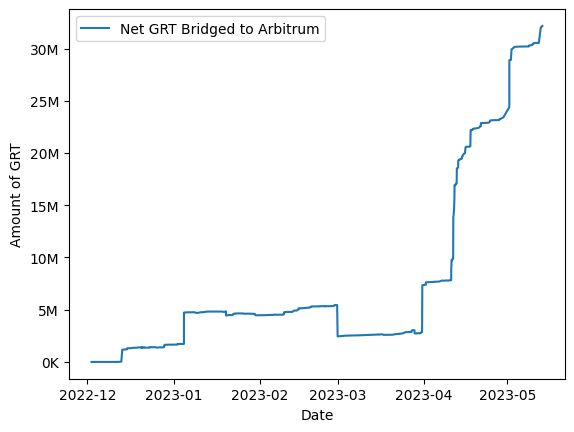

In [23]:
def millions_formatter(x, pos):
    if x < 1e6:
        return f"{x/1e3:.0f}K"
    elif x < 1e9:
        return f"{x/1e6:.0f}M"
    else:
        return f"{x/1e9:.0f}B"
    
# plot cumsum amount grouped by type in a time series line plot
# let amount b x axis
y_axis = pandas_df['amount'].cumsum()
x_axis = pandas_df['timestamp']

# plot x and y axis 
plt.plot(x_axis, y_axis, label='Net GRT Bridged to Arbitrum')
plt.ylabel('Amount of GRT')
# label x axis as Date
plt.xlabel('Date')

# format y axis to m
fmt = '${x:,.0f}M'
tick = ticker.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.legend()
plt.show();

In [24]:
# BILLING CONTRACT 0xba321653bdb2525c866d962ad66be358f6718d78
# https://etherscan.io/address/0xba321653bdb2525c866d962ad66be358f6718d78#code
# The billing contract allows for Graph Tokens to be added by a user. The
#  tokens are immediately sent to the Billing contract on L2 (Arbitrum)
#  through the GRT token bridge

# how much has the billing contract sent? 
pandas_df[pandas_df['from'] == '0xba321653bdb2525c866d962ad66be358f6718d78'].sort_index()

,timestamp,type,txHash,from,amount
2,2022-12-05 16:57:59,BridgeDeposit,0x9c55922330c1bf19d671f51f7cc2edd8d64140d87194...,0xba321653bdb2525c866d962ad66be358f6718d78,1.123457
4,2022-12-11 16:26:59,BridgeDeposit,0xd3c0c6ac6e3182e07c740192a2376dea6ebe0f8fa861...,0xba321653bdb2525c866d962ad66be358f6718d78,1.200000
5,2022-12-11 16:42:23,BridgeDeposit,0x8d758a1c1cf32533c06c0d9b5e0bf15920600b5c2069...,0xba321653bdb2525c866d962ad66be358f6718d78,1.600000
12,2022-12-13 15:31:35,BridgeDeposit,0x0704b3d2538898f63c1d10098814127844ddf9203678...,0xba321653bdb2525c866d962ad66be358f6718d78,0.700000
13,2022-12-13 15:32:35,BridgeDeposit,0x7c19f81c66671d5c067cccaf618a262d7bb0b4e230c6...,0xba321653bdb2525c866d962ad66be358f6718d78,2.000000
...,...,...,...,...,...
519,2023-05-09 04:50:35,BridgeDeposit,0x5fe22018310aae2a138b093825df2bc52ec232109136...,0xba321653bdb2525c866d962ad66be358f6718d78,6677.484999
523,2023-05-10 03:50:23,BridgeDeposit,0x0aa92a13f38389846c684a36ad3aa3aa3dc38f6cf0ca...,0xba321653bdb2525c866d962ad66be358f6718d78,81.055147
526,2023-05-12 01:45:47,BridgeDeposit,0xc430e0a910a0fb7ae60edba558cb364ad36ae02d91e5...,0xba321653bdb2525c866d962ad66be358f6718d78,500.000000
527,2023-05-12 06:35:47,BridgeDeposit,0x68bbac3b30c3b126af0d8a02abab99dedf4789c4d03d...,0xba321653bdb2525c866d962ad66be358f6718d78,2977.628857


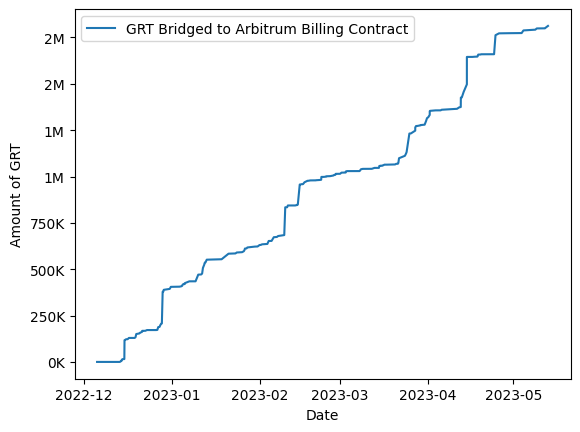

In [25]:
# plot cumsum amount grouped by type in a time series line plot
# let amount b x axis
y_axis2 = pandas_df[pandas_df['from'] == '0xba321653bdb2525c866d962ad66be358f6718d78'].sort_index()['amount'].cumsum()
x_axis2 = pandas_df[pandas_df['from'] == '0xba321653bdb2525c866d962ad66be358f6718d78'].sort_index()['timestamp']

# plot x and y axis 
plt.plot(x_axis2, y_axis2, label='GRT Bridged to Arbitrum Billing Contract')
plt.ylabel('Amount of GRT')
# label x axis as Date
plt.xlabel('Date')

# format y axis to m
fmt = '${x:,.0f}M'
tick = ticker.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.legend()
plt.show();